In [1]:
import os
from dotenv import load_dotenv
from pyannote.audio import Model
from pyannote.audio import Inference


load_dotenv()

token = os.environ.get("HUGGINGFACE_ACCESS_TOKEN")

model = Model.from_pretrained("pyannote/embedding", use_auth_token=token)

inference = Inference(model, window="whole")

Lightning automatically upgraded your loaded checkpoint from v1.2.7 to v2.3.3. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../.cache/torch/pyannote/models--pyannote--embedding/snapshots/4db4899737a38b2d618bbd74350915aa10293cb2/pytorch_model.bin`
Lightning automatically upgraded your loaded checkpoint from v1.2.7 to v2.3.3. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../.cache/torch/pyannote/models--pyannote--embedding/snapshots/4db4899737a38b2d618bbd74350915aa10293cb2/pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.3.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.8.1+cu102, yours is 2.3.1+cu121. Bad things might happen unless you revert torch to 1.x.
Model was trained with pyannote.audio 0.0.1, yours is 3.3.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.8.1+cu102, yours is 2.3.1+cu121. Bad things might happen unless you revert torch to 1.x.


In [2]:
root = "../out"

files = [
    os.path.join(root, dir, subdir, file)
    for dir in os.listdir(root)
    if ".DS_Store" not in dir
    for subdir in os.listdir(os.path.join(root, dir))
    if ".DS_Store" not in subdir
    for file in os.listdir(os.path.join(root, dir, subdir))
    if ".DS_Store" not in file
]

In [3]:
len(files)

14440

In [4]:
speaker_matrix = [inference(file) for file in files]

In [5]:
import umap as umap

embedding = umap.UMAP(n_components=2, metric="euclidean").fit(speaker_matrix)

In [6]:
embedding.embedding_.shape

(14440, 2)

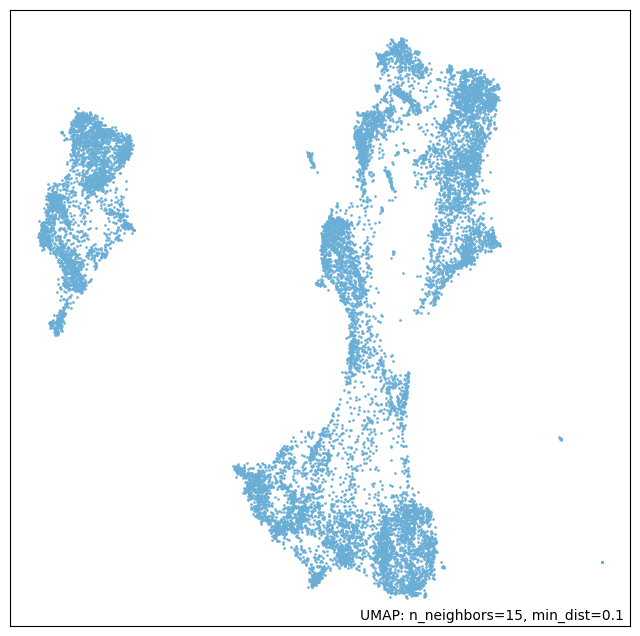

In [7]:
import umap.plot

f = umap.plot.points(embedding)